In [376]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython import display


def use_svg_display():
    display.set_matplotlib_formats('svg')

In [400]:
# Read JRTs
zipf_para = 2
utilization = 75
file = "JRTs_u{}_zipf{}".format(utilization/100, zipf_para)
print(file)
with open(file, "r") as f:
    obta_jrts = f.readline()
    nlip_jrts = f.readline()
    wf_jrts = f.readline()
    rd_jrts = f.readline()
    ocwf_jrts = f.readline()
    ocwf_acc_jrts = f.readline()

obta_jrts = [int(i) for i in obta_jrts.split(" ")[:-1]]
nlip_jrts = [int(i) for i in nlip_jrts.split(" ")[:-1]]
wf_jrts = [int(i) for i in wf_jrts.split(" ")[:-1]]
rd_jrts = [int(i) for i in rd_jrts.split(" ")[:-1]]
ocwf_jrts = [int(i) for i in ocwf_jrts.split(" ")[:-1]]
ocwf_acc_jrts = [int(i) for i in ocwf_acc_jrts.split(" ")[:-1]]

print(obta_jrts)

global_min = min(min(obta_jrts), min(nlip_jrts), min(wf_jrts), min(rd_jrts), min(ocwf_jrts), min(ocwf_acc_jrts))
global_max = max(max(obta_jrts), max(nlip_jrts), max(wf_jrts), max(rd_jrts), max(ocwf_jrts), max(ocwf_acc_jrts))
print("global min:", global_min, ", global max:", global_max)

JRTs_u0.75_zipf2
[24, 26, 13, 18, 18, 17, 27, 21, 1, 52, 61, 62, 64, 87, 1, 10, 1, 111, 1, 8, 1, 1, 3, 1, 1, 145, 154, 10, 164, 177, 129, 80, 193, 190, 225, 191, 227, 259, 267, 91, 8, 7, 130, 148, 1, 2, 115, 355, 326, 182, 196, 98, 37, 120, 358, 355, 191, 412, 435, 730, 732, 707, 746, 750, 917, 913, 932, 936, 975, 980, 1030, 1030, 1033, 1127, 1221, 1330, 1430, 1431, 1442, 1508, 1551, 1670, 1728, 1680, 1665, 1810, 1864, 1865, 1939, 1946, 2081, 2082, 2106, 2228, 2193, 2197, 2213, 2214, 2279, 2292, 2295, 2302, 2294, 2384, 2314, 2316, 2334, 2342, 2346, 2422, 2380, 2396, 2403, 2429, 2534, 2831, 2849, 2875, 2894, 2984, 3057, 3086, 3206, 3237, 3294, 3293, 3391, 3543, 3707, 3731, 3790, 3932, 3961, 3980, 3997, 4014, 4051, 4333, 4343, 4509, 4535, 4566, 4578, 4591, 4658, 4678, 4715, 4708, 4716, 4748, 4856, 4850, 4884, 4970, 4970, 4991, 5008, 5061, 5112, 5153, 5300, 5301, 5525, 5591, 5786, 5771, 5874, 5897, 6010, 6006, 5985, 6018, 6035, 6042, 6060, 6078, 6132, 6109, 6164, 6169, 6156, 6203, 6287, 6

/var/folders/4d/jhdkd2m10xb0_x8nvxdflv780000gp/T/ipykernel_31798/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


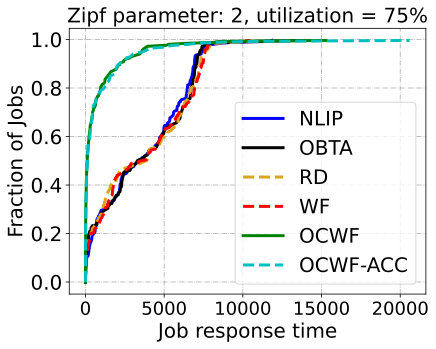

In [401]:
def plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, rd_jrts, ocwf_jrts, ocwf_acc_jrts):
    """
    Plot CDF of average JRTs.
    """
    use_svg_display()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.grid(linestyle='-.')

    ax1.plot(np.sort(nlip_jrts), np.linspace(0, 1, len(nlip_jrts), endpoint=False), color='b', ls='-', lw=3)
    ax1.plot(np.sort(obta_jrts), np.linspace(0, 1, len(obta_jrts), endpoint=False), color='k', ls='-', lw=3)
    ax1.plot(np.sort(rd_jrts), np.linspace(0, 1, len(rd_jrts), endpoint=False), color='goldenrod', ls='--', lw=3)
    ax1.plot(np.sort(wf_jrts), np.linspace(0, 1, len(wf_jrts), endpoint=False), color='r', ls='--', lw=3)
    ax1.plot(np.sort(ocwf_jrts), np.linspace(0, 1, len(ocwf_jrts), endpoint=False), color='g', ls='-', lw=3)
    ax1.plot(np.sort(ocwf_acc_jrts), np.linspace(0, 1, len(ocwf_acc_jrts), endpoint=False), color='c', ls='--', lw=3)
    

    ax1.legend(['NLIP', 'OBTA', 'RD', 'WF', 'OCWF', 'OCWF-ACC'], fontsize=20)
    ax1.set_ylabel('Fraction of Jobs', fontsize=20)
    ax1.set_xlabel('Job response time', fontsize=20)

    plt.title("Zipf parameter: {}, utilization = {}%".format(zipf_para, utilization), fontsize=20)
    plt.locator_params(axis='x', nbins=6)
    plt.xticks(fontsize=20-2)
    plt.yticks(fontsize=20)

    plt.savefig('zipf{}_u{}.eps'.format(zipf_para, utilization), bbox_inches='tight')
    plt.show()

    
plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, rd_jrts, ocwf_jrts, ocwf_acc_jrts)

/var/folders/4d/jhdkd2m10xb0_x8nvxdflv780000gp/T/ipykernel_31798/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


[[6.16480000e+02 7.27504000e+02 1.01711200e+03 3.60900000e+03]
 [6.04240000e+02 7.29304000e+02 1.03809600e+03 3.54726000e+03]
 [6.13116000e+02 7.91080000e+02 1.04316800e+03 3.61780000e+03]
 [6.17744000e+02 7.66996000e+02 1.03851200e+03 3.59553600e+03]
 [3.29408000e+02 3.55944000e+02 3.90936000e+02 7.12208000e+02]
 [3.33324000e+02 3.48716000e+02 4.03616000e+02 7.81824000e+02]
 [2.09647799e-02 1.95272379e-02 1.90935516e-02 1.72258177e-02]
 [5.07395573e-02 4.55275497e-02 4.34875698e-02 3.61340914e-02]
 [3.78457069e-04 3.25113297e-04 3.83141518e-04 3.94177437e-04]
 [1.56574850e-02 1.50174465e-02 1.54596195e-02 1.72813358e-02]
 [4.15113147e+00 4.15171057e+00 4.30373726e+00 4.02109103e+00]
 [2.40621146e+00 2.47779646e+00 2.32249985e+00 2.60185863e+00]]
[0.02096478 0.01952724 0.01909355 0.01722582] [0.05073956 0.04552755 0.04348757 0.03613409] [0.00037846 0.00032511 0.00038314 0.00039418] [0.01565749 0.01501745 0.01545962 0.01728134] [4.15113147 4.15171057 4.30373726 4.02109103] [2.40621146 2

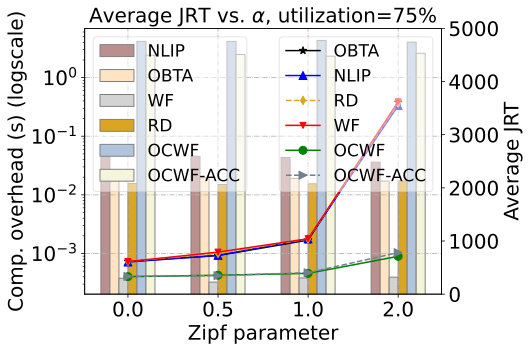

In [348]:
def plot_curve_and_bar(file, utilization, fontsize=20):
    """
    THE LHS is the curve figure of avergae JRT. The RHS is the bar figure of computation overhead.
    """
    use_svg_display()
    
    data = np.loadtxt(file, delimiter=' ')
    print(data)

    x = np.array([1, 3, 5, 7])
    x_label = np.array([0, 0.5, 1, 2])

    OBTA = data[0]
    NLIP = data[1]
    WF = data[2]
    RD = data[3]
    OCWF = data[4]
    OCWF_ACC = data[5]

    OBTA_time = data[6]
    NLIP_time = data[7]
    WF_time = data[8]
    RD_time = data[9]
    OCWF_time = data[10]
    OCWF_ACC_time = data[11]
    print(OBTA_time, NLIP_time, WF_time, RD_time, OCWF_time, OCWF_ACC_time)

    width = 0.2

    fig = plt.figure()

    title_str = r"Average JRT vs. $\alpha$, " + "utilization={}%".format(int(utilization * 100))
    
    ax1 = fig.add_subplot(111)
    ax1.set_title(title_str, fontsize=fontsize)
    ax1.grid(linestyle='-.')
    
    ax1.bar(x - 2.5 * width, NLIP_time, width, label='NLIP', edgecolor='gray', color='rosybrown')
    ax1.bar(x - 1.5 * width, OBTA_time, width, label='OBTA', edgecolor='gray', color='bisque')
    ax1.bar(x - 0.5 * width, WF_time, width, label='WF', edgecolor='gray', color='lightgrey')
    ax1.bar(x + 0.5 * width, RD_time, width, label='RD', edgecolor='gray', color='goldenrod')
    ax1.bar(x + 1.5 * width, OCWF_time, width, label='OCWF', edgecolor='gray', color='lightsteelblue')
    ax1.bar(x + 2.5 * width, OCWF_ACC_time, width, label='OCWF-ACC', edgecolor='gray', color='beige')
    ax1.set_xlabel('Zipf parameter', fontsize=fontsize)
    y = [-4, -3, -2, -1, 0, 1]
    y_label = [r"$10^{-4}$", r"$10^{-3}$",r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^{1}$"]
    ax1.set_yticks(y, labels=y_label, fontsize=fontsize)
    plt.yscale("log")
    ax1.set_xticks(x, labels=x_label, fontsize=fontsize)
    
    ax2 = ax1.twinx()
    ax2.plot(x, OBTA, color='k', ls='-', linewidth=1.5, marker='*', ms=8, label='OBTA')
    ax2.plot(x, NLIP, color='b', ls='-', linewidth=1.5, marker='^', ms=8, label='NLIP')
    ax2.plot(x, RD, color='goldenrod', ls='--', linewidth=1.5, marker='d', ms=6, label='RD')
    ax2.plot(x, WF, color='r', ls='-', linewidth=1.5, marker='v', ms=6, label='WF')
    ax2.plot(x, OCWF, color='g', ls='-', linewidth=1.5, marker='o', ms=8, label='OCWF')
    ax2.plot(x, OCWF_ACC, color='slategray', ls='--', linewidth=1.5, marker='>', ms=8, label='OCWF-ACC')
    ax1.set_ylabel('Comp. overhead (s) (logscale)', fontsize=fontsize)
    ax2.set_ylabel('Average JRT', fontsize=fontsize)
    ax2.set_xlabel('Zipf parameter', fontsize=fontsize)
    ax2.set_xticks(x, labels=x_label, fontsize=fontsize)
    plt.ylim([0, 5000])
    
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    ax1.legend(fontsize=fontsize-3, loc='upper left', fancybox=True, framealpha=0.5)
    ax2.legend(fontsize=fontsize-3, loc='upper right', fancybox=True, framealpha=0.5)
    plt.savefig("{}.pdf".format(file), bbox_inches='tight')
    plt.show()

utilization = 0.75
plot_curve_and_bar("res_u{}".format(utilization), utilization)

/var/folders/4d/jhdkd2m10xb0_x8nvxdflv780000gp/T/ipykernel_31798/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


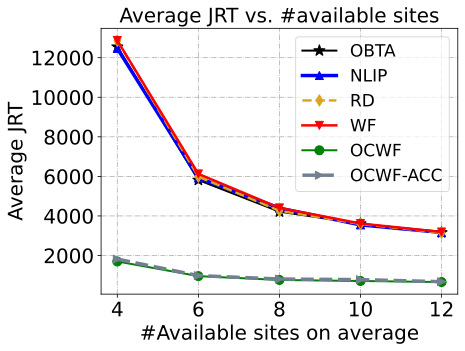

In [372]:
def plot_AS_num(file, fontsize=20):
    use_svg_display()
    
    data = np.loadtxt(file, delimiter=' ')

    x = np.array([1, 3, 5, 7, 9])
    x_label = np.array([4, 6, 8, 10, 12])

    OBTA = data[0]
    NLIP = data[1]
    WF = data[2]
    RD = data[3]
    OCWF = data[4]
    OCWF_ACC = data[5]

    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.set_title(r"Average JRT vs. #available sites", fontsize=fontsize)
    ax1.grid(linestyle='-.')
    
    ax1.plot(x, OBTA, color='k', ls='-', linewidth=2, marker='*', ms=12, label='OBTA')
    ax1.plot(x, NLIP, color='b', ls='-', linewidth=3.5, marker='^', ms=8, label='NLIP')
    ax1.plot(x, RD, color='goldenrod', ls='--', linewidth=2.5, marker='d', ms=8, label='RD')
    ax1.plot(x, WF, color='r', ls='-', linewidth=2.5, marker='v', ms=8, label='WF')
    ax1.plot(x, OCWF, color='g', ls='-', linewidth=2, marker='o', ms=9, label='OCWF')
    ax1.plot(x, OCWF_ACC, color='slategray', ls='--', linewidth=3.5, marker='>', ms=8, label='OCWF-ACC')
    ax1.set_ylabel('Average JRT', fontsize=fontsize)
    ax1.set_xlabel("#Available sites on average", fontsize=fontsize)
    ax1.set_xticks(x, labels=x_label, fontsize=fontsize)
    
    plt.yticks(fontsize=fontsize)
    
    ax1.legend(fontsize=fontsize-3, loc='upper right', fancybox=True, framealpha=0.75)
    
    plt.savefig("AS_num.pdf", bbox_inches='tight')
    plt.show()

    
plot_AS_num("res_AS_num")

/var/folders/4d/jhdkd2m10xb0_x8nvxdflv780000gp/T/ipykernel_31798/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


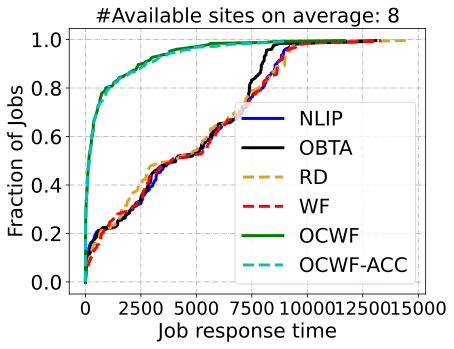

In [409]:
# Draw JRTs with different available sites
file = "JRTs_u0.75_zipf2_minAS6_maxAS10"
with open(file, "r") as f:
    obta_jrts = f.readline()
    nlip_jrts = f.readline()
    wf_jrts = f.readline()
    rd_jrts = f.readline()
    ocwf_jrts = f.readline()
    ocwf_acc_jrts = f.readline()

obta_jrts = [int(i) for i in obta_jrts.split(" ")[:-1]]
nlip_jrts = [int(i) for i in nlip_jrts.split(" ")[:-1]]
wf_jrts = [int(i) for i in wf_jrts.split(" ")[:-1]]
rd_jrts = [int(i) for i in rd_jrts.split(" ")[:-1]]
ocwf_jrts = [int(i) for i in ocwf_jrts.split(" ")[:-1]]
ocwf_acc_jrts = [int(i) for i in ocwf_acc_jrts.split(" ")[:-1]]

def plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, rd_jrts, ocwf_jrts, ocwf_acc_jrts):
    """
    Plot CDF of average JRTs.
    """
    use_svg_display()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.grid(linestyle='-.')

    ax1.plot(np.sort(nlip_jrts), np.linspace(0, 1, len(nlip_jrts), endpoint=False), color='b', ls='-', lw=3)
    ax1.plot(np.sort(obta_jrts), np.linspace(0, 1, len(obta_jrts), endpoint=False), color='k', ls='-', lw=3)
    ax1.plot(np.sort(rd_jrts), np.linspace(0, 1, len(rd_jrts), endpoint=False), color='goldenrod', ls='--', lw=3)
    ax1.plot(np.sort(wf_jrts), np.linspace(0, 1, len(wf_jrts), endpoint=False), color='r', ls='--', lw=3)
    ax1.plot(np.sort(ocwf_jrts), np.linspace(0, 1, len(ocwf_jrts), endpoint=False), color='g', ls='-', lw=3)
    ax1.plot(np.sort(ocwf_acc_jrts), np.linspace(0, 1, len(ocwf_acc_jrts), endpoint=False), color='c', ls='--', lw=3)
    

    ax1.legend(['NLIP', 'OBTA', 'RD', 'WF', 'OCWF', 'OCWF-ACC'], fontsize=20)
    ax1.set_ylabel('Fraction of Jobs', fontsize=20)
    ax1.set_xlabel('Job response time', fontsize=20)

    plt.title("#Available sites on average: {}".format(8), fontsize=20)
    plt.locator_params(axis='x', nbins=7)
    plt.xticks(fontsize=20-2)
    plt.yticks(fontsize=20)

    plt.savefig(file + '.pdf', bbox_inches='tight')
    plt.show()

    
plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, rd_jrts, ocwf_jrts, ocwf_acc_jrts)

In [371]:
def plot_cap(file, fontsize=20):
    use_svg_display()
    
    data = np.loadtxt(file, delimiter=' ')

    x = np.array([1, 3, 5, 7])
    x_label = np.array([2, 4, 6, 8])

    OBTA = data[0]
    NLIP = data[1]
    WF = data[2]
    RD = data[3]
    OCWF = data[4]
    OCWF_ACC = data[5]

    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.set_title(r"Average JRT vs. computing capacities", fontsize=fontsize)
    ax1.grid(linestyle='-.')
    
    ax1.plot(x, NLIP, color='b', ls='-', linewidth=3.5, marker='^', ms=8, label='NLIP')
    ax1.plot(x, OBTA, color='k', ls='-', linewidth=2, marker='*', ms=12, label='OBTA')
    ax1.plot(x, RD, color='y', ls='--', linewidth=2.5, marker='v', ms=8, label='RD')
    ax1.plot(x, WF, color='r', ls='--', linewidth=2.5, marker='v', ms=8, label='WF')
    ax1.plot(x, OCWF, color='g', ls='-', linewidth=2, marker='o', ms=9, label='OCWF')
    ax1.plot(x, OCWF_ACC, color='slategray', ls='--', linewidth=3.5, marker='>', ms=8, label='OCWF-ACC')
    ax1.set_ylabel('Average JRT', fontsize=fontsize)
    ax1.set_xlabel("Computing capacity on average", fontsize=fontsize)
    ax1.set_xticks(x, labels=x_label, fontsize=fontsize)
    
    plt.yticks(fontsize=fontsize)
    
    ax1.legend(fontsize=fontsize-3, loc='upper right', fancybox=True, framealpha=0.75)
    
    plt.savefig("cap.pdf", bbox_inches='tight')
    plt.show()

    
plot_cap("res_cap")

/var/folders/4d/jhdkd2m10xb0_x8nvxdflv780000gp/T/ipykernel_31798/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


FileNotFoundError: res_cap not found.

/var/folders/4d/jhdkd2m10xb0_x8nvxdflv780000gp/T/ipykernel_31798/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


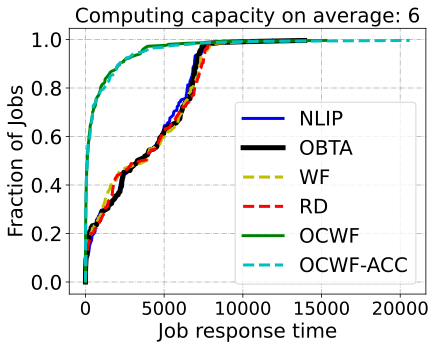

In [375]:
# Draw JRTs with different computing capacties
file = "JRTs_u0.75_zipf2"
with open(file, "r") as f:
    obta_jrts = f.readline()
    nlip_jrts = f.readline()
    wf_jrts = f.readline()
    rd_jrts = f.readline()
    ocwf_jrts = f.readline()
    ocwf_acc_jrts = f.readline()

obta_jrts = [int(i) for i in obta_jrts.split(" ")[:-1]]
nlip_jrts = [int(i) for i in nlip_jrts.split(" ")[:-1]]
wf_jrts = [int(i) for i in wf_jrts.split(" ")[:-1]]
rd_jrts = [int(i) for i in rd_jrts.split(" ")[:-1]]
ocwf_jrts = [int(i) for i in ocwf_jrts.split(" ")[:-1]]
ocwf_acc_jrts = [int(i) for i in ocwf_acc_jrts.split(" ")[:-1]]

def plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, rd_jrts, ocwf_jrts, ocwf_acc_jrts):
    """
    Plot CDF of average JRTs.
    """
    use_svg_display()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.grid(linestyle='-.')

    ax1.plot(np.sort(nlip_jrts), np.linspace(0, 1, len(nlip_jrts), endpoint=False), color='b', ls='-', lw=3)
    ax1.plot(np.sort(obta_jrts), np.linspace(0, 1, len(obta_jrts), endpoint=False), color='k', ls='-', lw=5)
    ax1.plot(np.sort(rd_jrts), np.linspace(0, 1, len(rd_jrts), endpoint=False), color='y', ls='--', lw=3)
    ax1.plot(np.sort(wf_jrts), np.linspace(0, 1, len(wf_jrts), endpoint=False), color='r', ls='--', lw=3)
    ax1.plot(np.sort(ocwf_jrts), np.linspace(0, 1, len(ocwf_jrts), endpoint=False), color='g', ls='-', lw=3)
    ax1.plot(np.sort(ocwf_acc_jrts), np.linspace(0, 1, len(ocwf_acc_jrts), endpoint=False), color='c', ls='--', lw=3)
    

    ax1.legend(['NLIP', 'OBTA', 'WF', 'RD', 'OCWF', 'OCWF-ACC'], fontsize=20)
    ax1.set_ylabel('Fraction of Jobs', fontsize=20)
    ax1.set_xlabel('Job response time', fontsize=20)

    plt.title("Computing capacity on average: {}".format(6), fontsize=20)
    plt.locator_params(axis='x', nbins=7)
    plt.xticks(fontsize=20-2)
    plt.yticks(fontsize=20)

    plt.savefig(file + '.pdf', bbox_inches='tight')
    plt.show()

    
plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, rd_jrts, ocwf_jrts, ocwf_acc_jrts)

In [144]:
OBTA_acc = 0

data = np.loadtxt("res_u0.25", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OBTA_acc += np.average(OBTA_time / NLIP_time)

data = np.loadtxt("res_u0.5", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OBTA_acc += np.average(OBTA_time / NLIP_time)

data = np.loadtxt("res_u0.75", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OBTA_acc += np.average(OBTA_time / NLIP_time)

print(OBTA_acc / 3)

0.5065594558549168


In [145]:
WF_acc = 0

data = np.loadtxt("res_u0.25", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
WF_acc += np.average(WF_time / OBTA_time)

data = np.loadtxt("res_u0.5", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
WF_acc += np.average(WF_time / OBTA_time)

data = np.loadtxt("res_u0.75", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
WF_acc += np.average(WF_time / OBTA_time)

print(WF_acc / 3)

0.01057671379239526


In [146]:
OCWF_acc = 0

data = np.loadtxt("res_u0.25", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OCWF_acc += np.average(OCWF_ACC_time / OCWF_time)

data = np.loadtxt("res_u0.5", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OCWF_acc += np.average(OCWF_ACC_time / OCWF_time)

data = np.loadtxt("res_u0.75", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OCWF_acc += np.average(OCWF_ACC_time / OCWF_time)

print(OCWF_acc / 3)

0.6308408974027575
